In [1]:
from PIL import Image, ImageTk
from PIL.ExifTags import TAGS
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import const
from tqdm import tqdm

Calcul des moyennes: 100%|██████████| 524/524 [09:24<00:00,  1.08s/it]


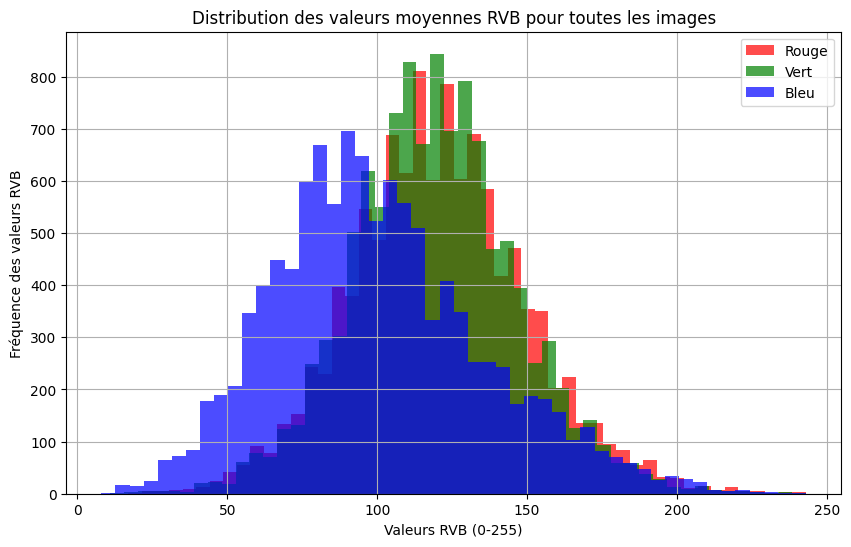

In [3]:
df = pd.read_csv(os.path.join(const.DATA_PATH, "image_cleaned_ref.csv"))
especes_oiseaux = set(df['birdName'])

mean_by_bird_r, mean_by_bird_g, mean_by_bird_b = [], [], []

for oiseau in tqdm(especes_oiseaux, "Calcul des moyennes"):
    for image_nom  in os.listdir(os.path.join(const.DATASET_CLEAN_PATH,"test", oiseau)):
        image_path = os.path.join(const.DATASET_CLEAN_PATH,"test", oiseau, image_nom)
        image = Image.open(image_path)
        image_rgb = image.convert('RGB')
        r_total, g_total, b_total = 0, 0, 0
        for x in range(image.width):
            for y in range(image.height):
                r, g, b = image_rgb.getpixel((x, y))
                r_total += r
                g_total += g
                b_total += b
        r_avg = r_total // (image.width * image.height)
        g_avg = g_total // (image.width * image.height)
        b_avg = b_total // (image.width * image.height)
        mean_by_bird_r.append(r_avg)
        mean_by_bird_g.append(g_avg)
        mean_by_bird_b.append(b_avg)

# histogramme
plt.figure(figsize=(10, 6))
plt.title("Distribution des valeurs moyennes RVB pour toutes les images")
plt.xlabel("Valeurs RVB (0-255)")
plt.ylabel("Fréquence des valeurs RVB")
plt.hist(mean_by_bird_r, bins=50, alpha=0.7, color='red', label='Rouge')
plt.hist(mean_by_bird_g, bins=50, alpha=0.7, color='green', label='Vert')
plt.hist(mean_by_bird_b, bins=50, alpha=0.7, color='blue', label='Bleu')
plt.legend()
plt.grid(True)
plt.show()


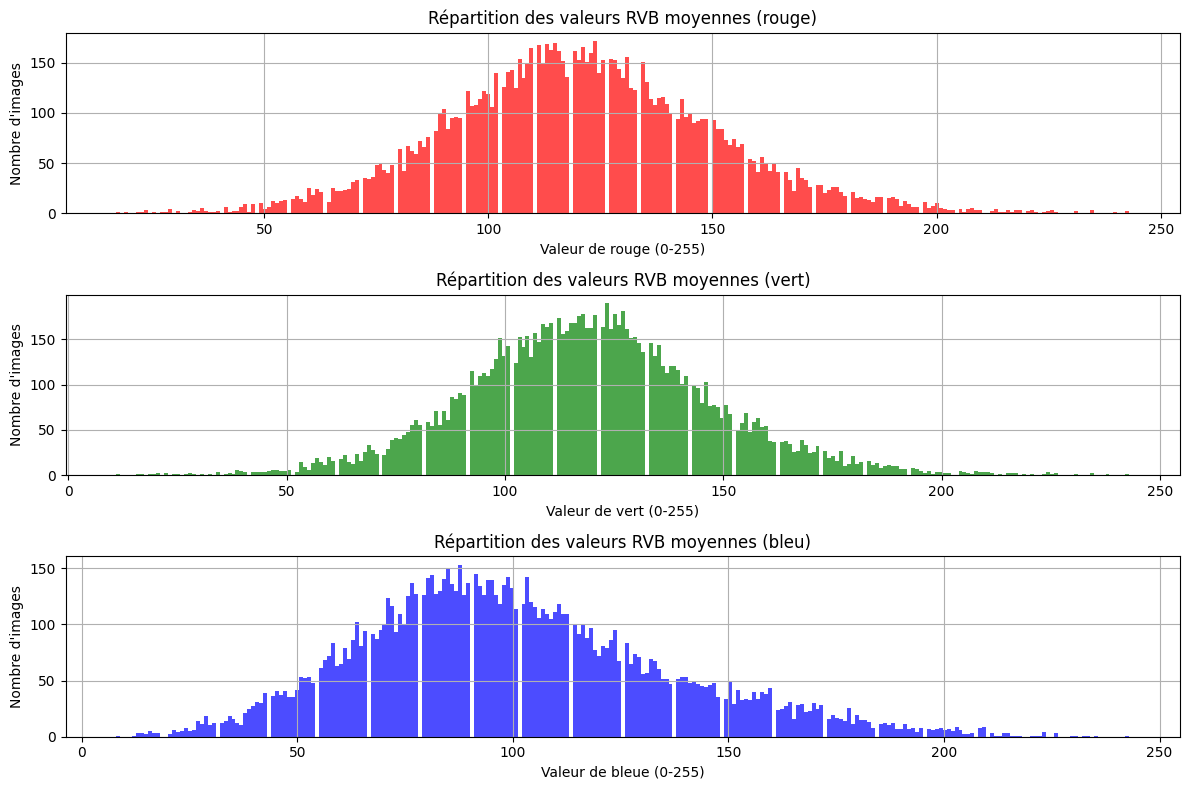

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(mean_by_bird_r, bins=255, alpha=0.7, color='red', label='Rouge')
plt.title("Répartition des valeurs RVB moyennes (rouge)")
plt.xlabel("Valeur de rouge (0-255)")
plt.ylabel("Nombre d'images")
plt.grid(True)


plt.subplot(3, 1, 2)
plt.hist(mean_by_bird_g, bins=255, alpha=0.7, color='green', label='Vert')
plt.title("Répartition des valeurs RVB moyennes (vert)")
plt.xlabel("Valeur de vert (0-255)")
plt.ylabel("Nombre d'images")
plt.grid(True)


plt.subplot(3, 1, 3)
plt.hist(mean_by_bird_b, bins=255, alpha=0.7, color='blue', label='Bleu')
plt.title("Répartition des valeurs RVB moyennes (bleu)")
plt.xlabel("Valeur de bleue (0-255)")
plt.ylabel("Nombre d'images")
plt.grid(True)

plt.tight_layout()
plt.show()


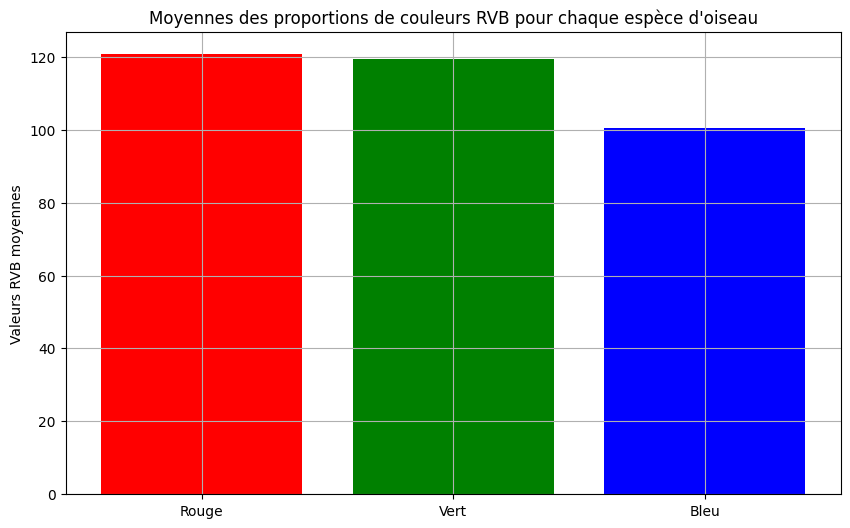

In [4]:
# moyennes RVB
all_bird_mean_r = np.mean(mean_by_bird_r)
all_bird_mean_g = np.mean(mean_by_bird_g)
all_bird_mean_b = np.mean(mean_by_bird_b)


plt.figure(figsize=(10, 6))
plt.title("Moyennes des proportions de couleurs RVB pour chaque espèce d'oiseau")
plt.ylabel("Valeurs RVB moyennes")
plt.bar(['Rouge', 'Vert', 'Bleu'], [all_bird_mean_r, all_bird_mean_g, all_bird_mean_b], color=['red', 'green', 'blue'])
plt.grid(True)
plt.show()


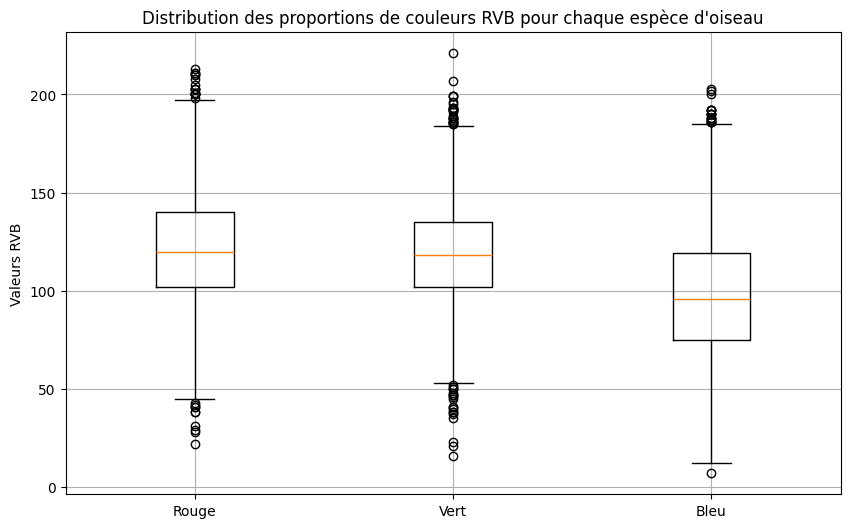

In [18]:
# boîte à moustaches
plt.figure(figsize=(10, 6))
plt.title("Distribution des proportions de couleurs RVB pour chaque espèce d'oiseau")
plt.ylabel("Valeurs RVB")
plt.boxplot([mean_by_bird_r, mean_by_bird_g, mean_by_bird_b], labels=['Rouge', 'Vert', 'Bleu'])
plt.grid(True)
plt.show()


In [7]:
from ipywidgets import interact_manual, widgets

# on analyse le RVB pour chaque espèce d'oiseau
def get_rgb_data(espece):
    mean_r, mean_g, mean_b = [], [], []
    try:
        for image_nom in os.listdir(os.path.join(const.DATASET_CLEAN_PATH,"test", espece)):
            image_path = os.path.join(const.DATASET_CLEAN_PATH,"test", espece, image_nom)
            image = Image.open(image_path)
            image_rgb = image.convert('RGB')
            r_total, g_total, b_total = 0, 0, 0
            for x in range(image.width):
                for y in range(image.height):
                    r, g, b = image_rgb.getpixel((x, y))
                    r_total += r
                    g_total += g
                    b_total += b
            r_avg = r_total // (image.width * image.height)
            g_avg = g_total // (image.width * image.height)
            b_avg = b_total // (image.width * image.height)
            mean_r.append(r_avg)
            mean_g.append(g_avg)
            mean_b.append(b_avg)
    except Exception as e:
        print(f"An error occurred: {e}")
    return mean_r, mean_g, mean_b


# calcul des pourcentages RVB
def calculate_rgb_percentages(espece):
    mean_r, mean_g, mean_b = get_rgb_data(espece)
    total = sum(mean_r) + sum(mean_g) + sum(mean_b)
    r_percentage = sum(mean_r) / total * 100
    g_percentage = sum(mean_g) / total * 100
    b_percentage = sum(mean_b) / total * 100
    print(f"Pour l'espèce {espece}, les pourcentages des couleurs RVB sont :")
    print(f"Rouge : {r_percentage:.2f}%")
    print(f"Vert : {g_percentage:.2f}%")
    print(f"Bleu : {b_percentage:.2f}%")

interact_manual(calculate_rgb_percentages, espece=widgets.Dropdown(options=especes_oiseaux, description="Espèce d'oiseau:"));


interactive(children=(Dropdown(description="Espèce d'oiseau:", options=('RED TAILED HAWK', 'MASKED BOBWHITE', …

In [8]:
from ipywidgets import interact_manual, widgets

def calculate_percentage_difference(espece1, espece2):
    mean_r1, mean_g1, mean_b1 = get_rgb_data(espece1)
    mean_r2, mean_g2, mean_b2 = get_rgb_data(espece2)

    r_diff = abs(np.mean(mean_r1) - np.mean(mean_r2)) / ((np.mean(mean_r1) + np.mean(mean_r2)) / 2) * 100
    g_diff = abs(np.mean(mean_g1) - np.mean(mean_g2)) / ((np.mean(mean_g1) + np.mean(mean_g2)) / 2) * 100
    b_diff = abs(np.mean(mean_b1) - np.mean(mean_b2)) / ((np.mean(mean_b1) + np.mean(mean_b2)) / 2) * 100

    print(f"La différence en pourcentage des valeurs RVB moyennes entre {espece1} et {espece2} est :")
    print(f"Rouge : {r_diff:.2f}%")
    print(f"Vert : {g_diff:.2f}%")
    print(f"Bleu : {b_diff:.2f}%")


interact_manual(calculate_percentage_difference, espece1=widgets.Dropdown(options=especes_oiseaux, description="Espèce d'oiseau 1:"), espece2=widgets.Dropdown(options=especes_oiseaux, description="Espèce d'oiseau 2:"));


interactive(children=(Dropdown(description="Espèce d'oiseau 1:", options=('RED TAILED HAWK', 'MASKED BOBWHITE'…

Calcul de toutes les moyennes: 100%|██████████| 524/524 [05:38<00:00,  1.55it/s]


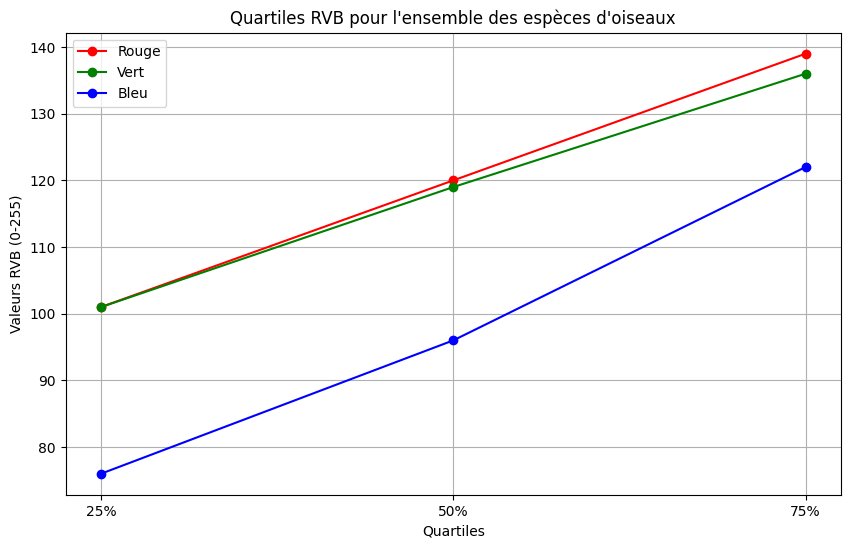

In [10]:

all_mean_r, all_mean_g, all_mean_b = [], [], []

for oiseau in tqdm(especes_oiseaux, "Calcul de toutes les moyennes"):
    mean_by_bird_r, mean_by_bird_g, mean_by_bird_b = get_rgb_data(oiseau)
    all_mean_r.extend(mean_by_bird_r)
    all_mean_g.extend(mean_by_bird_g)
    all_mean_b.extend(mean_by_bird_b)

# graphique des quantiles
fig, ax = plt.subplots(figsize=(10, 6))

# quantiles pour la couleur rouge
quartile_r = [np.percentile(all_mean_r, 25), np.percentile(all_mean_r, 50), np.percentile(all_mean_r, 75)]
ax.plot(quartile_r, color='red', marker='o', label='Rouge')

# quantiles pour la couleur verte
quartile_g = [np.percentile(all_mean_g, 25), np.percentile(all_mean_g, 50), np.percentile(all_mean_g, 75)]
ax.plot(quartile_g, color='green', marker='o', label='Vert')

# quantiles pour la couleur bleue
quartile_b = [np.percentile(all_mean_b, 25), np.percentile(all_mean_b, 50), np.percentile(all_mean_b, 75)]
ax.plot(quartile_b, color='blue', marker='o', label='Bleu')

ax.set_xticks(range(3))
ax.set_xticklabels(['25%', '50%', '75%'])
ax.set_title("Quartiles RVB pour l'ensemble des espèces d'oiseaux")
ax.set_xlabel("Quartiles")
ax.set_ylabel("Valeurs RVB (0-255)")
ax.legend()

plt.grid(True)
plt.show()


In [11]:
# on calcul des valeurs RVB moyennes pour chaque espèce d'oiseau
rgb_values = {espece: get_rgb_data(espece) for espece in especes_oiseaux}

# détermination de l'espèce avec le plus de rouge, de vert et de bleu
max_r = max(rgb_values, key=lambda x: rgb_values[x][0])
max_g = max(rgb_values, key=lambda x: rgb_values[x][1])
max_b = max(rgb_values, key=lambda x: rgb_values[x][2])

print(f"L'espèce avec le plus de rouge est : {max_r}")
print(f"L'espèce avec le plus de vert est : {max_g}")
print(f"L'espèce avec le plus de bleu est : {max_b}")


L'espèce avec le plus de rouge est : ROSY FACED LOVEBIRD
L'espèce avec le plus de vert est : BLACK FACED SPOONBILL
L'espèce avec le plus de bleu est : BLACK FACED SPOONBILL
